#### 2. Create a content-based recommender system which recommends top N movies based on similar movie(m) genres.    ➢ Movie Title (t): Toy Story    ➢ Num recommendations (N): 5


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
movies_rating=pd.read_csv('ratings.csv')
movies_rating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [56]:
df=pd.read_csv('movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [57]:
data=pd.merge(df,movies_rating)
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [58]:
data.shape

(105339, 6)

In [59]:
print(data['movieId'].nunique())
print(data['title'].nunique())
print(data['genres'].nunique())
print(data['userId'].nunique())

10325
10323
938
668


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    105339 non-null  int64  
 1   title      105339 non-null  object 
 2   genres     105339 non-null  object 
 3   userId     105339 non-null  int64  
 4   rating     105339 non-null  float64
 5   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


In [61]:
data.describe()

,movieId,userId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,13381.312477,364.924539,3.516850,1.130424e+09
std,26170.456869,197.486905,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,1073.000000,192.000000,3.000000,9.711008e+08
50%,2497.000000,383.000000,3.500000,1.115154e+09
75%,5991.000000,557.000000,4.000000,1.275496e+09
max,149532.000000,668.000000,5.000000,1.452405e+09


In [62]:
data.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [63]:
data.nunique()

movieId      10325
title        10323
genres         938
userId         668
rating          10
timestamp    84686
dtype: int64

In [64]:
data.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
                                         ... 
Cold Weather (2010)                       0.5
Life During Wartime (2009)                0.5
Dark Days (2000)                          0.5
Biker Boyz (2003)                         0.5
Trog (1970)                               0.5
Name: rating, Length: 10323, dtype: float64

In [65]:
data.groupby('title')['rating'].count().sort_values(ascending=False)

title
Pulp Fiction (1994)                          325
Forrest Gump (1994)                          311
Shawshank Redemption, The (1994)             308
Jurassic Park (1993)                         294
Silence of the Lambs, The (1991)             290
                                            ... 
Kind Lady (1935)                               1
Killing of Sister George, The (1968)           1
Killing Season (2013)                          1
Killer Klowns from Outer Space (1988)          1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 10323, dtype: int64

In [66]:
ratings=pd.DataFrame(data.groupby('title')['rating'].mean())

ratings['num of review']=pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num of review
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


In [67]:
data.groupby('title')['rating'].agg(['mean','count']).rename(columns={'count':'num of review','mean':'rating'}).head()

,rating,num of review
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


<Axes: >

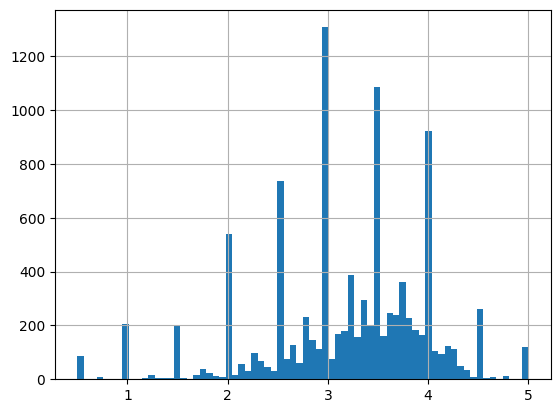

In [68]:
ratings['rating'].hist(bins=70)

<Axes: >

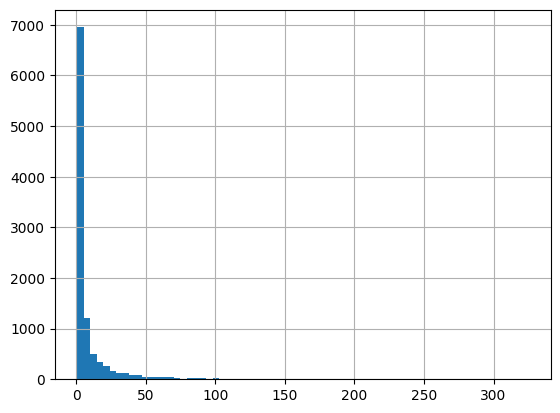

In [69]:
ratings['num of review'].hist(bins=70)

In [70]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [71]:
moviemat=data.pivot_table(index='userId',columns=('title'),values='rating')
moviemat

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [72]:
ratings.sort_values('num of review',ascending=False).head(5)

,rating,num of review
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290


In [73]:
Toystory_user_ratings=moviemat['Toy Story (1995)']

Toystory_user_ratings.head()

userId
1    NaN
2    5.0
3    NaN
4    NaN
5    4.0
Name: Toy Story (1995), dtype: float64

In [74]:
Toystory=moviemat.corrwith(Toystory_user_ratings)
Toystory.head()

C:\Users\victo\miniconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\victo\miniconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\victo\miniconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\victo\miniconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\victo\miniconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Til There Was You (1997)                       NaN
'burbs, The (1989)                         0.470402
dtype: float64

In [75]:
corr_toystory=pd.DataFrame(Toystory,columns=['Correlation'])
corr_toystory.head()

,Correlation
title,
'71 (2014),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Round Midnight (1986),NaN
'Til There Was You (1997),NaN
"'burbs, The (1989)",0.470402


In [76]:
corr_toystory=corr_toystory.join(ratings['num of review'])
corr_toystory.head()

,Correlation,num of review
title,,
'71 (2014),NaN,1
'Hellboy': The Seeds of Creation (2004),NaN,1
'Round Midnight (1986),NaN,1
'Til There Was You (1997),NaN,3
"'burbs, The (1989)",0.470402,20


In [77]:
corr_toystory[corr_toystory['num of review']> 100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of review
title,,
Toy Story (1995),1.000000,232
Toy Story 2 (1999),0.709677,104
Austin Powers: The Spy Who Shagged Me (1999),0.580651,117
Crimson Tide (1995),0.578642,107
Austin Powers: International Man of Mystery (1997),0.533061,101
"Bug's Life, A (1998)",0.506905,102
Babe (1995),0.504718,129
Shakespeare in Love (1998),0.498968,106
Who Framed Roger Rabbit? (1988),0.498878,115


#### 1. Create a popularity-based recommender system at a genre level. User will input a genre (g), minimum ratings threshold (t) for a movie and no. of  recommendations(N) for which it should be recommended top N movies which are most popular within that genre (g) ordered by ratings in descending orderwhere each movie has at least (t) reviews. ➢ Genre (g): Comedy       ➢ Minimum reviews threshold (t): 100      ➢ Num recommendations (N): 5


In [78]:
df=data.groupby('genres').get_group('Comedy')
df

,movieId,title,genres,userId,rating,timestamp
393,5,Father of the Bride Part II (1995),Comedy,2,3.0,859046959
394,5,Father of the Bride Part II (1995),Comedy,3,3.0,841483936
395,5,Father of the Bride Part II (1995),Comedy,8,3.0,858611848
396,5,Father of the Bride Part II (1995),Comedy,14,3.0,851766337
397,5,Father of the Bride Part II (1995),Comedy,22,2.5,1111573645
...,...,...,...,...,...,...
105263,136447,George Carlin: You Are All Diseased (1999),Comedy,576,4.0,1445292179
105294,140110,"Intern, The (2015)",Comedy,531,4.0,1452087046
105296,140265,George Carlin: Jammin' in New York (1992),Comedy,576,4.5,1448938143
105333,146878,Le Grand Restaurant (1966),Comedy,622,2.5,1447514637


In [79]:
df.genres.value_counts()

genres
Comedy    6676
Name: count, dtype: int64

In [80]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
George Carlin: Life Is Worth Losing (2005)                       5.0
Women on the 6th Floor, The (Les Femmes du 6ème Étage) (2010)    5.0
School For Scoundrels (1960)                                     5.0
Schizopolis (1996)                                               5.0
Rocky VI (1986)                                                  5.0
                                                                ... 
B*A*P*S (1997)                                                   0.5
Who's Your Caddy? (2007)                                         0.5
Hotel (2001)                                                     0.5
Old Dogs (2009)                                                  0.5
Confessions of a Teenage Drama Queen (2004)                      0.5
Name: rating, Length: 825, dtype: float64

In [81]:
df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Ace Ventura: Pet Detective (1994)      173
Ferris Bueller's Day Off (1986)        128
Birdcage, The (1996)                   106
Monty Python's Life of Brian (1979)    103
Clerks (1994)                          101
                                      ... 
Promotion, The (2008)                    1
Grand, The (2007)                        1
Great Buck Howard, The (2008)            1
Great McGinty, The (1940)                1
Knock on Wood (1954)                     1
Name: rating, Length: 825, dtype: int64

In [82]:
ratings_1=pd.DataFrame(df.groupby('title')['rating'].mean())

ratings_1['num of review']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings_1.head()

,rating,num of review
title,,
"'burbs, The (1989)",3.125,20
2 Days in New York (2012),2.500,2
21 and Over (2013),3.750,2
"41-Year-Old Virgin Who Knocked Up Sarah Marshall and Felt Superbad About It, The (2010)",2.000,1
"6th Man, The (Sixth Man, The) (1997)",3.000,1


In [83]:
df.groupby('title')['rating'].agg(['mean','count']).rename(columns={'count':'num of review','mean':'rating'}).head()

,rating,num of review
title,,
"'burbs, The (1989)",3.125,20
2 Days in New York (2012),2.500,2
21 and Over (2013),3.750,2
"41-Year-Old Virgin Who Knocked Up Sarah Marshall and Felt Superbad About It, The (2010)",2.000,1
"6th Man, The (Sixth Man, The) (1997)",3.000,1


In [84]:
matrix=df.pivot_table(index='userId',columns=('title'),values='rating')
matrix.head()

title,"'burbs, The (1989)",2 Days in New York (2012),21 and Over (2013),"41-Year-Old Virgin Who Knocked Up Sarah Marshall and Felt Superbad About It, The (2010)","6th Man, The (Sixth Man, The) (1997)",8 Heads in a Duffel Bag (1997),99 francs (2007),A Very Murray Christmas (2015),Accepted (2006),Ace Ventura: Pet Detective (1994),...,You Again (2010),You Don't Mess with the Zohan (2008),"You, Me and Dupree (2006)",Young Doctors in Love (1982),Young Einstein (1988),Zebraman (2004),Zelig (1983),Zookeeper (2011),Zoolander (2001),"Zorro, the Gay Blade (1981)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
ratings_1.sort_values('num of review',ascending=False).head(5)

,rating,num of review
title,,
Ace Ventura: Pet Detective (1994),2.849711,173
Ferris Bueller's Day Off (1986),3.960938,128
"Birdcage, The (1996)",3.551887,106
Monty Python's Life of Brian (1979),3.810680,103
Clerks (1994),3.980198,101


In [86]:
corr_1=matrix.corrwith(matrix)
corr_1.head()

title
'burbs, The (1989)                                                                         1.0
2 Days in New York (2012)                                                                  NaN
21 and Over (2013)                                                                         1.0
41-Year-Old Virgin Who Knocked Up Sarah Marshall and Felt Superbad About It, The (2010)    NaN
6th Man, The (Sixth Man, The) (1997)                                                       NaN
dtype: float64

In [87]:
corr_movies=pd.DataFrame(corr_1,columns=['Correlation'])
corr_movies.head()

,Correlation
title,
"'burbs, The (1989)",1.0
2 Days in New York (2012),NaN
21 and Over (2013),1.0
"41-Year-Old Virgin Who Knocked Up Sarah Marshall and Felt Superbad About It, The (2010)",NaN
"6th Man, The (Sixth Man, The) (1997)",NaN


In [88]:
corr_movies=corr_movies.join(ratings['num of review'])
corr_movies.head()

,Correlation,num of review
title,,
"'burbs, The (1989)",1.0,20
2 Days in New York (2012),NaN,2
21 and Over (2013),1.0,2
"41-Year-Old Virgin Who Knocked Up Sarah Marshall and Felt Superbad About It, The (2010)",NaN,1
"6th Man, The (Sixth Man, The) (1997)",NaN,1


In [89]:
corr_movies[corr_movies['num of review']> 100].sort_values('Correlation',ascending=False)

,Correlation,num of review
title,,
Ace Ventura: Pet Detective (1994),1.0,173
Ferris Bueller's Day Off (1986),1.0,128
"Birdcage, The (1996)",1.0,106
Clerks (1994),1.0,101
Monty Python's Life of Brian (1979),1.0,103


#### 3. Create a collaborative based recommender system which recommends top N
#### movies based on “K” similar users for a target user “u”
#### UserID: 1 ➢ Num recommendations(N): 5 ➢ Threshold for similar users (k): 100

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
movies_rating=pd.read_csv('ratings.csv')
movies_rating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [92]:
df=pd.read_csv('movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [93]:
data=pd.merge(df,movies_rating)
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


### EDA . the average rating for the movie is calculated as well

In [94]:
agg_rating=data.groupby('title').agg(mean_rating=('rating','mean'),
                                    number_of_rating=('rating','count')).reset_index()
agg_rating.head()

,title,mean_rating,number_of_rating
0,'71 (2014),3.500,1
1,'Hellboy': The Seeds of Creation (2004),3.000,1
2,'Round Midnight (1986),2.500,1
3,'Til There Was You (1997),4.000,3
4,"'burbs, The (1989)",3.125,20


In [95]:
agg_rating_GT100=agg_rating[agg_rating['number_of_rating']>100]
agg_rating_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 60 to 10204
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             150 non-null    object 
 1   mean_rating       150 non-null    float64
 2   number_of_rating  150 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ KB


### Lets check what the most popular movies and ratings are

In [96]:
agg_rating_GT100.sort_values(by='number_of_rating',ascending=False).head()

,title,mean_rating,number_of_rating
7323,Pulp Fiction (1994),4.160000,325
3349,Forrest Gump (1994),4.138264,311
8136,"Shawshank Redemption, The (1994)",4.454545,308
4934,Jurassic Park (1993),3.659864,294
8228,"Silence of the Lambs, The (1991)",4.194828,290


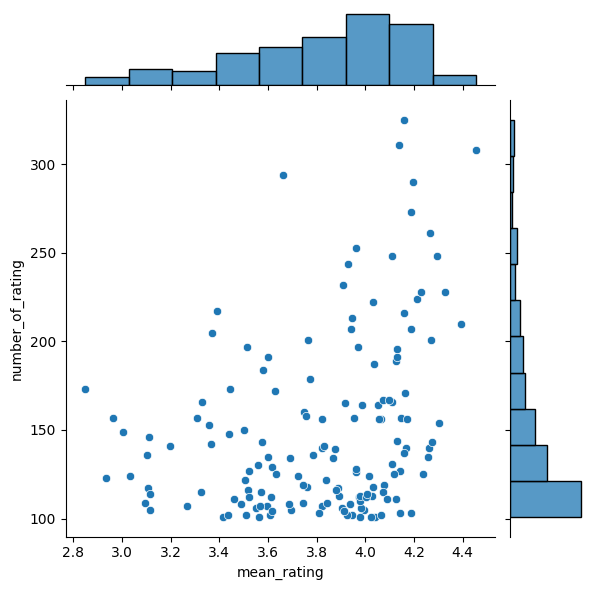

In [97]:
sns.jointplot(x='mean_rating',y='number_of_rating',data=agg_rating_GT100)

### To keep only the 150 movies more than 100 ratings , we need to join the movie with the user rating level dataframe

In [98]:
data_GT100=pd.merge(data,agg_rating_GT100[['title']],on='title',how='inner')
data_GT100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movieId    22556 non-null  int64  
 1   title      22556 non-null  object 
 2   genres     22556 non-null  object 
 3   userId     22556 non-null  int64  
 4   rating     22556 non-null  float64
 5   timestamp  22556 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.0+ MB


In [99]:
print(data_GT100['title'].nunique())
print(data_GT100['movieId'].nunique())
print(data_GT100['userId'].nunique())

150
150
653


### after filtering the movies with over 100 ratings, we have 653 users that rated 150 movies

In [100]:
moviemat=data_GT100.pivot_table(index='userId',columns=('title'),values='rating')
moviemat.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),"Usual Suspects, The (1995)",Waterworld (1995),While You Were Sleeping (1995),Who Framed Roger Rabbit? (1988),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)",X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,4.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,5.0,NaN,3.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN
5,NaN,1.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### After normalization, the movie with  rating less than users avg rating get a negative value,and the movie rating greater than users avg rating get a postive value

In [101]:
matrix_norm=moviemat.subtract(moviemat.mean(axis=1),axis='rows')
matrix_norm.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),"Usual Suspects, The (1995)",Waterworld (1995),While You Were Sleeping (1995),Who Framed Roger Rabbit? (1988),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)",X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,0.169231,NaN,NaN,NaN,...,NaN,0.169231,-0.830769,0.169231,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.111111,-0.111111,NaN,NaN,NaN,NaN,-0.111111,NaN,NaN
3,NaN,NaN,-0.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.714286,1.285714,NaN,-0.714286,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.937500,NaN,NaN,NaN,NaN,0.9375,NaN,0.9375,NaN
5,NaN,-1.7,0.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### identify the similar users using pearson corr .it will adjust for means

In [102]:
users_similarity=matrix_norm.T.corr()
users_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.306186,0.614559,0.431124,-0.094491,0.471405,0.153463,0.369274,0.195776,-1.0,...,0.099066,0.375769,0.107583,0.349334,0.410803,-0.505322,0.029258,0.018696,0.144082,0.230468
2,-0.306186,1.000000,0.866025,-1.000000,NaN,NaN,-0.555556,0.577350,0.333333,NaN,...,-1.000000,NaN,0.816497,-0.577350,NaN,NaN,-0.174078,NaN,-1.000000,0.388556
3,0.614559,0.866025,1.000000,NaN,0.162938,NaN,-0.228587,1.000000,0.391121,-1.0,...,0.345186,0.585540,1.000000,0.000000,0.252050,-0.491398,0.484123,0.336336,0.392989,0.231076
4,0.431124,-1.000000,NaN,1.000000,NaN,NaN,-0.115186,NaN,-0.250000,NaN,...,-0.662266,NaN,-1.000000,0.408248,NaN,NaN,-0.801784,-0.063610,0.965824,0.291551
5,-0.094491,NaN,0.162938,NaN,1.000000,-0.970725,0.077671,NaN,-0.158114,NaN,...,-0.427828,NaN,NaN,0.960769,NaN,-0.548611,0.104257,-0.944911,-0.052658,-0.113529


#### Now, lets use user_id 1 as an example to illustrate how to find similar users
#### we first need to Exclude user id 1 from the similar user list and decide the number of similar users
#### value ranges from -1 to 1 and -1 refers to opposite movie preference and 1 means same movie preference

In [103]:
user_id=1

users_similarity.drop(index=user_id,inplace=True)

users_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
2,-0.306186,1.000000,0.866025,-1.0,NaN,NaN,-0.555556,0.57735,0.333333,NaN,...,-1.000000,NaN,0.816497,-0.577350,NaN,NaN,-0.174078,NaN,-1.000000,0.388556
3,0.614559,0.866025,1.000000,NaN,0.162938,NaN,-0.228587,1.00000,0.391121,-1.0,...,0.345186,0.58554,1.000000,0.000000,0.25205,-0.491398,0.484123,0.336336,0.392989,0.231076
4,0.431124,-1.000000,NaN,1.0,NaN,NaN,-0.115186,NaN,-0.250000,NaN,...,-0.662266,NaN,-1.000000,0.408248,NaN,NaN,-0.801784,-0.063610,0.965824,0.291551
5,-0.094491,NaN,0.162938,NaN,1.000000,-0.970725,0.077671,NaN,-0.158114,NaN,...,-0.427828,NaN,NaN,0.960769,NaN,-0.548611,0.104257,-0.944911,-0.052658,-0.113529
6,0.471405,NaN,NaN,NaN,-0.970725,1.000000,0.309426,NaN,NaN,NaN,...,0.302614,NaN,NaN,0.132453,NaN,NaN,-0.166667,NaN,1.000000,-0.080930


#### Taking n=5 means we would pick the top 5 most similar userid 1 and user_threshold taken as 0.3 it means than corr coefficent is atleast 0.3 to be consider as similar user

#### after setting number of similar users and similarity threshold , we sort the user similarity value fromhighest to lowest , then printed out the most similar user id and pearson corr value

In [104]:
n=5

user_similarity_threshold=0.3

#get the top n similar users

similar_users=users_similarity[users_similarity[user_id] > user_similarity_threshold][user_id].sort_values(ascending=False)[:n]

print(f'similar users:', similar_users)

similar users: userId
34     1.0
154    1.0
67     1.0
117    1.0
533    1.0
Name: 1, dtype: float64


#### narrow down item pool
#### remove movies that have been watched by the target userid 1
#### keep only the movies that similar users have watched 
#### To remove the movies watched by the target users, we keep only the row for userid=1 in the user item matrix and remove the items with missing values

In [105]:
user_id_watched=matrix_norm[matrix_norm.index==user_id].dropna(axis=1,how='all')
user_id_watched

title,American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Batman Begins (2005),"Beautiful Mind, A (2001)","Bourne Identity, The (2002)",Braveheart (1995),Casablanca (1942),Clear and Present Danger (1994),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),There's Something About Mary (1998),Titanic (1997),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,0.169231,-0.830769,-0.830769,-1.330769,0.669231,0.169231,0.169231,0.169231,1.169231,0.669231,...,0.669231,0.669231,0.669231,-0.330769,-2.330769,-2.330769,-0.830769,0.169231,-0.830769,0.169231


### To keep only the similar users movie , we keep the user id in the top 5 similiar users lists and remove the film with all missing values.(all missing value for a movie means that none of the similar users have watched the movie)

In [106]:
similar_user_movies=matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1,how='all')
similar_user_movies

title,American Beauty (1999),Austin Powers: The Spy Who Shagged Me (1999),Batman Begins (2005),Being John Malkovich (1999),"Breakfast Club, The (1985)",Broken Arrow (1996),Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),Ferris Bueller's Day Off (1986),"Fifth Element, The (1997)","Fish Called Wanda, A (1988)",...,Mission: Impossible (1996),Rain Man (1988),"Rock, The (1996)","Sixth Sense, The (1999)",Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode VI - Return of the Jedi (1983),Titanic (1997),Toy Story (1995),Twister (1996),Willy Wonka & the Chocolate Factory (1971)
userId,,,,,,,,,,,,,,,,,,,,,
34,NaN,NaN,NaN,NaN,NaN,NaN,0.400,NaN,NaN,NaN,...,NaN,-0.6,NaN,-0.6,0.4,0.4,NaN,NaN,NaN,NaN
67,-0.125,-0.625,NaN,-0.125,-0.625,NaN,0.875,NaN,0.875,-1.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,-1.0,-1.0
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN
533,NaN,NaN,0.5,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Next, we will drop the movie that user id 1 watched from the none similar user watched list.and drop columns if they exist without giving an error message

In [107]:
similar_user_movies.drop(user_id_watched.columns,axis=1,inplace=True,errors='ignore')
similar_user_movies.head()

title,Austin Powers: The Spy Who Shagged Me (1999),Being John Malkovich (1999),"Breakfast Club, The (1985)",Broken Arrow (1996),Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),Ferris Bueller's Day Off (1986),"Fifth Element, The (1997)","Fish Called Wanda, A (1988)",Heat (1995),"Rock, The (1996)",Toy Story (1995),Willy Wonka & the Chocolate Factory (1971)
userId,,,,,,,,,,,,
34,NaN,NaN,NaN,NaN,0.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,-0.625,-0.125,-0.625,NaN,0.875,NaN,0.875,-1.125,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,-1.0
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
533,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_movies.columns:
  # Get the ratings for movie i
  movie_rating = similar_user_movies[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['title','rating'])

# Sort the movies by score
ranked_item_score = item_score.sort_values(by='rating', ascending=False)

# Select top m movies
m = 5
ranked_item_score.head(m)

,title,rating
8,Heat (1995),1.0000
6,"Fifth Element, The (1997)",0.8750
4,Dr. Strangelove or: How I Learned to Stop Worr...,0.6375
5,Ferris Bueller's Day Off (1986),0.0000
9,"Rock, The (1996)",0.0000


In [113]:
avg_rating=moviemat[moviemat.index==user_id].T.mean()[user_id]
print(f'average movie rating for userid {user_id} is {avg_rating:.2f}')

average movie rating for userid 1 is 3.83


In [110]:
ranked_item_score['predicated rating']=ranked_item_score['rating']
ranked_item_score.head()

,title,rating,predicated rating
8,Heat (1995),1.0000,1.0000
6,"Fifth Element, The (1997)",0.8750,0.8750
4,Dr. Strangelove or: How I Learned to Stop Worr...,0.6375,0.6375
5,Ferris Bueller's Day Off (1986),0.0000,0.0000
9,"Rock, The (1996)",0.0000,0.0000
